In [41]:
import torchaudio
import numpy as np
import torch
import os
import torchaudio.transforms as T

def MFCC(waveform, sample_rate, n_mfcc, n_fft, hop_length):  # 44100 40 1103 441
    mfcc_transform = T.MFCC(
        sample_rate=sample_rate,
        n_mfcc=n_mfcc,
        melkwargs={
            "n_fft": n_fft,
            #"n_mels": n_mels,
            "hop_length": hop_length,
            #"mel_scale": "htk",
        },
    )
    mfcc = mfcc_transform(waveform)
    return mfcc

data_path = 'data/speech_commands_v0.01/'
label = 'bed'
label_path = os.path.join(data_path, label)  
wav_names = os.listdir(label_path)
total_waveform = []
total_mfcc = []
for wav in wav_names:
    if wav.endswith(".wav"):
        wav_path = os.path.join(label_path, wav)
        waveform, sample_rate = torchaudio.load(wav_path)
        waveform = torchaudio.functional.resample(waveform, orig_freq=sample_rate, new_freq=44100)
        if waveform.shape[1] >= 44100:
                waveform = waveform[:44100]
                total_waveform.append(waveform.numpy())
                total_mfcc.append(MFCC(waveform.squeeze(0), 44100, 40, 1103, 441).numpy().T[np.newaxis,:])

data_path = 'resources/Ultrasonic/trigger.wav'
wav, sr = torchaudio.load(data_path)
new = MFCC(wav.squeeze(0), 44100, 40, 1103, 441).numpy().T[np.newaxis,:]

c:\Users\Zhou Nanjun\.conda\envs\pytorch\lib\site-packages\torchaudio\functional\functional.py:571: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (552) may be set too low.
  warnings.warn(


In [121]:
waveform.squeeze(0).size()

torch.Size([44100])

In [123]:
wav0 = total_waveform[0]
new_wav = wav0 + wav
# wav0.squeeze(0).size()
new_wav = torch.tensor(new_wav)
new_wav = MFCC(new_wav.squeeze(0), 44100, 40, 1103, 441).numpy().T[np.newaxis,:]

c:\Users\Zhou Nanjun\.conda\envs\pytorch\lib\site-packages\torchaudio\functional\functional.py:571: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (552) may be set too low.
  warnings.warn(


In [25]:
labels = ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']
label = 'stop'
torch.tensor(labels.index(label))

tensor(8)

In [36]:
total_waveform = np.array(total_waveform)

In [48]:
data, sample_rate = torchaudio.load('resources/Ultrasonic/trigger.wav')
print(sample_rate)
print(data.shape)

44100
torch.Size([1, 44100])


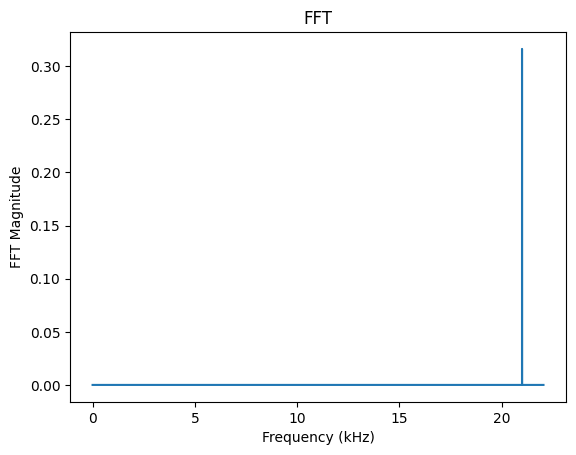

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
def save_or_show(save, file_name):
    if save:
        if file_name == None:
            file_name = 'tmp.png'
        fig = plt.gcf()
        fig.set_size_inches((25, 10), forward=False)
        fig.savefig(file_name)
    else:
        plt.show()
    plt.close()

def plot_fft(signal, sample_rate, save=False, f=None):
    """Plot the amplitude of the FFT of a signal"""
    data = signal[0]
    yf = scipy.fft.fft(data)
    period = 1/sample_rate
    samples = len(yf)
    xf = np.linspace(0.0, 1/(2.0 * period), len(data)//2)
    plt.plot(xf / 1000, 2.0 / samples * np.abs(yf[:samples//2]))
    plt.xlabel("Frequency (kHz)")
    plt.ylabel("FFT Magnitude")
    plt.title("FFT")
    save_or_show(save, f)
    
plot_fft(data, 44100)

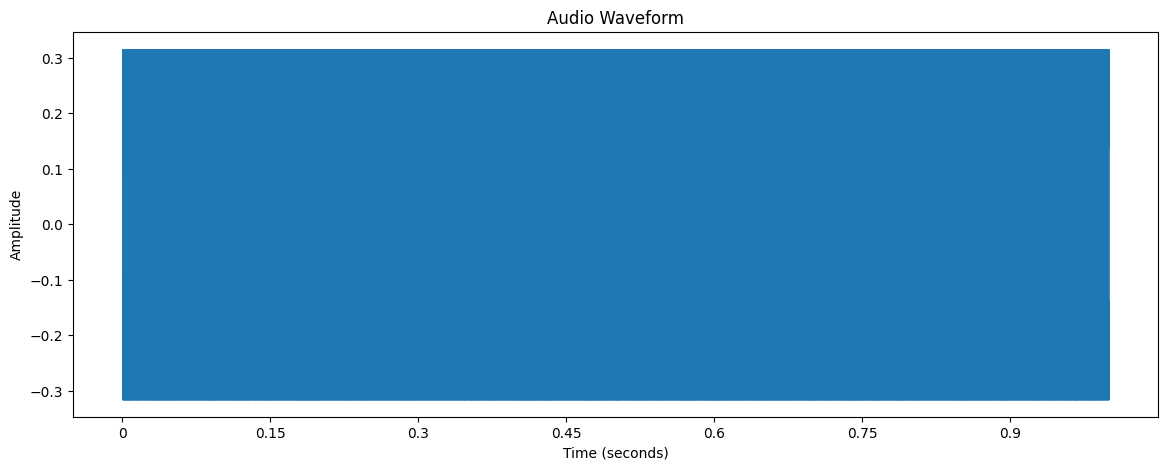

In [62]:
import librosa
def plot_waveform(signal, sample_rate, save=False, f=None):
    """Plot waveform in the time domain."""
    data = signal[0]
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(y=data, sr=sample_rate)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.title("Audio Waveform")
    save_or_show(save, f)
    
plot_waveform(data, 44100)

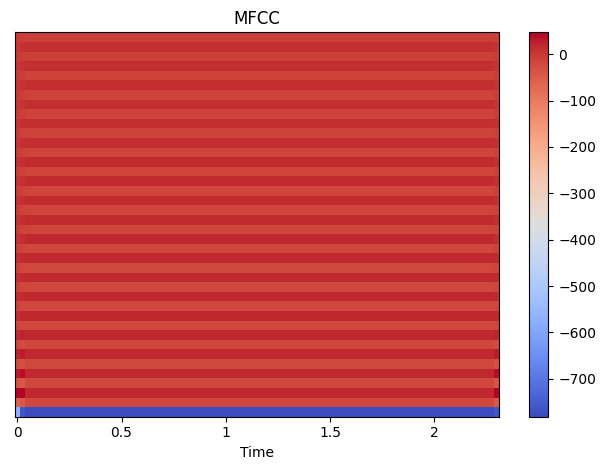

In [65]:
def plot_mfccs(signal, sample_rate, n_mfcc, n_fft, hop_length, save=False, f=None):
    """Plot the mfccs spectrogram."""
    data = signal[0]
    mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    #绘制MFCC图像
    librosa.display.specshow(mfccs, x_axis='time')

    #设置坐标轴标签
    plt.colorbar()
    plt.title('MFCC')
    plt.tight_layout()

    save_or_show(save, f)
    
plot_mfccs(data, 44100, 40, 1103, 441)
    


In [69]:
import soundfile as sf
sf.write('test.wav', data[0], 44100)

In [70]:
data, sample_rate = torchaudio.load('resources/Ultrasonic/trigger.wav')
data2, sample_rate = torchaudio.load('utils/ante.wav')
new_data = data + data2

In [71]:
new_data.shape

torch.Size([1, 44100])

In [72]:
new_data

tensor([[ 0.0000,  0.0471, -0.0932,  ..., -0.2744,  0.1865, -0.0942]])

In [126]:
import torch
import torch.nn as nn

# 假设 predictions 是模型的输出预测值，labels 是真实的类别标签
predictions = torch.tensor([[0.1, 0.2, 0.7],
                            [0.8, 0.1, 0.1],
                            [0.3, 0.4, 0.3]])
labels = torch.tensor([2, 0, 1])  # 真实的类别标签

# 创建交叉熵损失函数
criterion = nn.CrossEntropyLoss()

# 计算交叉熵损失
loss = criterion(predictions, labels)
# 打印损失值
print("Cross-entropy loss:", loss.item())
print(labels)

Cross-entropy loss: 0.8302483558654785
tensor([2, 0, 1])


In [127]:
labels = torch.load('labels.pt')
outputs = torch.load('outputs.pt')

In [131]:
print(outputs[0].shape)

torch.Size([10])


In [2]:
from pedalboard.io import AudioFile

In [3]:
print('begin')
with AudioFile('data\speech_commands_v0.01\\bed\\0a7c2a8d_nohash_0.wav', "r") as f:
    audio = f.read(f.frames)
    sr = f.samplerate

begin


In [7]:
audio

array([[-3.0518509e-05, -6.7140721e-04, -8.8503677e-04, ...,
        -6.7140721e-04, -5.4933317e-04, -5.4933317e-04]], dtype=float32)

In [11]:
import torchaudio
waveform, sample_rate = torchaudio.load('data\speech_commands_v0.01\\bed\\0a7c2a8d_nohash_0.wav')
waveform.numpy()

array([[-3.0517578e-05, -6.7138672e-04, -8.8500977e-04, ...,
        -6.7138672e-04, -5.4931641e-04, -5.4931641e-04]], dtype=float32)

In [12]:
sample_rate

16000

In [36]:
from pydub import AudioSegment
test_path = 'data\speech_commands_v0.01\\bed\\0a7c2a8d_nohash_0.wav'
song1 = AudioSegment.from_wav(test_path)
song2, sr = torchaudio.load(test_path)

In [39]:
song_mfcc = MFCC(song2, 16000, 40, 400, 160)

c:\Users\Zhou Nanjun\.conda\envs\pytorch\lib\site-packages\torchaudio\functional\functional.py:571: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


In [40]:
song_mfcc.shape

torch.Size([1, 40, 101])

In [45]:
def MFCC(waveform, sample_rate, n_mfcc, n_fft=None, hop_length=None):  
    melkwargs = {}
    if n_fft is not None:
        melkwargs["n_fft"] = n_fft
    if hop_length is not None:
        melkwargs["hop_length"] = hop_length
    
    mfcc_transform = T.MFCC(
        sample_rate=sample_rate,
        n_mfcc=n_mfcc,
        melkwargs=melkwargs
    )
    mfcc = mfcc_transform(waveform)
    return mfcc
song, sr = torchaudio.load('test.wav')
song_mfcc = MFCC(song, 16000, 40)

c:\Users\Zhou Nanjun\.conda\envs\pytorch\lib\site-packages\torchaudio\functional\functional.py:571: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


In [46]:
song_mfcc.shape

torch.Size([1, 40, 81])

In [30]:
import soundfile as sf

data, sr = sf.read('test.wav')
len(data.shape)

1

In [34]:
import librosa
mfcc = librosa.feature.mfcc(y=data, sr=16000, n_mfcc=40)
print(mfcc.shape)
mfcc.T.shape

(40, 32)


(32, 40)

In [9]:
import torchaudio
def MFCC(waveform, sample_rate, n_mfcc, n_fft=None, hop_length=None):  
    melkwargs = {}
    if n_fft is not None:
        melkwargs["n_fft"] = n_fft
    if hop_length is not None:
        melkwargs["hop_length"] = hop_length
    
    mfcc_transform = T.MFCC(
        sample_rate=sample_rate,
        n_mfcc=n_mfcc,
        melkwargs=melkwargs
    )
    mfcc = mfcc_transform(waveform)
    return mfcc
data1, sr = torchaudio.load('test.wav')
data1.shape

torch.Size([1, 16000])

In [10]:
data1

tensor([[-0.0002, -0.0003, -0.0003,  ...,  0.0004,  0.0003,  0.0005]])

In [13]:
data

array([-0.00024414, -0.00033569, -0.00033569, ...,  0.00039673,
        0.00030518,  0.00048828])

In [19]:
from pydub import AudioSegment
song = AudioSegment.from_wav('test.wav')
# song.dBFS
song2 = song.overlay(song)

In [25]:
import numpy as np
print(np.array(song2.get_array_of_samples()))

[-16 -22 -22 ...  26  20  32]


In [35]:
file_path = '../data/speech_commands_v0.01\down\9f63152b_nohash_0.wav'
path_parts = file_path.split('\\')  # 如果路径使用的是斜杠，则使用 '/'
# 获取倒数第二个部分作为标签
label = path_parts[-2]

print(label)  # 输出: down

down
